In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# Load all dataframes 
df_2020 = pd.read_csv("bloom_classification_2020.csv")
df_2021 = pd.read_csv("bloom_classification_2021.csv")
df_2022 = pd.read_csv("bloom_classification_2022.csv")
df_2023 = pd.read_csv("bloom_classification_2023.csv")
df_2024 = pd.read_csv("bloom_classification_2024.csv")
df_2025 = pd.read_csv("bloom_classification_2025.csv")

In [5]:
# Add year column to each if not present
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022
df_2023['year'] = 2023
df_2024['year'] = 2024
df_2025['year'] = 2025

# Combine all
df_comb = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# Sort by date
df_comb['date'] = pd.to_datetime(df_comb['date'])
df_comb = df_comb.sort_values('date')

In [6]:
df_comb.head(5)

,date,none_pct,low_pct,medium_pct,high_pct,total_pixels,year
0,2020-02-10,0.277778,99.797386,0.136166,0.0,360,2020
1,2020-02-11,1.405636,92.904759,5.924544,0.0,883,2020
2,2020-02-13,2.479204,82.715884,15.177510,0.0,1584,2020
3,2020-02-16,2.647466,94.857490,2.512934,0.0,11552,2020
4,2020-02-20,0.990362,98.921015,0.000000,0.0,177,2020


In [12]:
df_comb["medium_pct"].max()

97.35709323364972

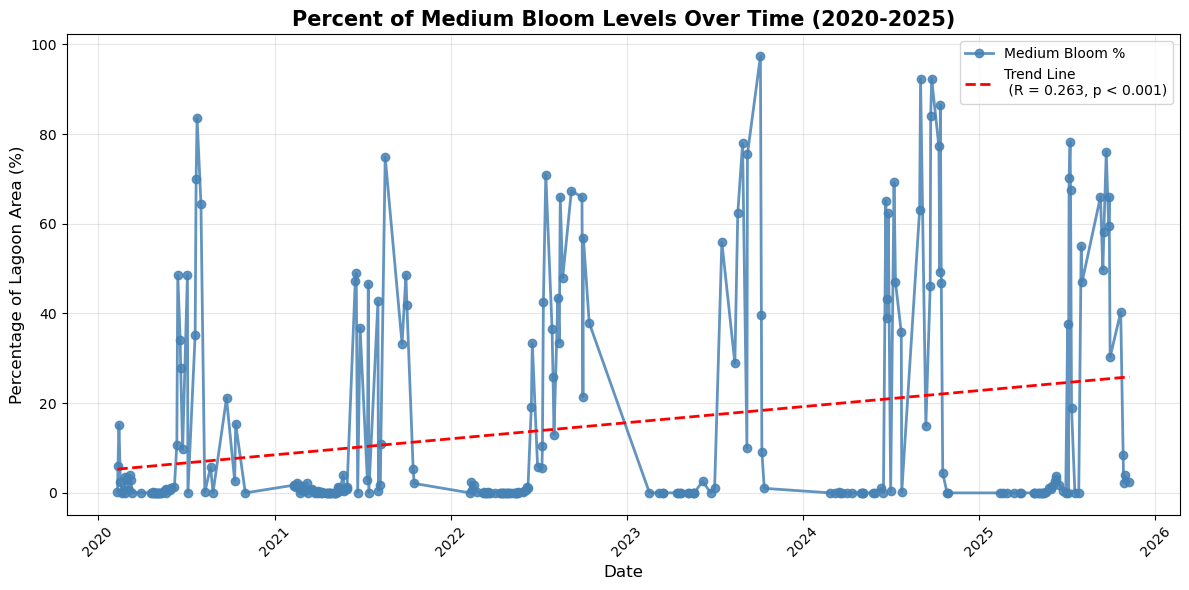

In [35]:
plt.figure(figsize=(12, 6))

# Plot each category as a line
plt.plot(df_comb['date'], df_comb['medium_pct'], label='Medium Bloom %', marker='o', linewidth=2, color = 'steelblue', alpha = 0.85)

# Calculate trend line
# Convert dates to numeric values for regression
df_comb['date_numeric'] = (df_comb['date'] - df_comb['date'].min()).dt.days

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_comb['date_numeric'], df_comb['medium_pct'])

# Create trend line
trend_line = slope * df_comb['date_numeric'] + intercept

trend_eq = f'{slope:3f}X + {intercept:3f}'

# Plot trend line with all stats in label
plt.plot(df_comb['date'], trend_line, '--', color='red', linewidth=2, 
         label=f'Trend Line\n (R = {r_value:.3f}, p < 0.001)')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Lagoon Area (%)', fontsize=12)
plt.title('Percent of Medium Bloom Levels Over Time (2020-2025)', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
print(r_value)
print(p_value)

0.26303312162411596
8.489815185050779e-06


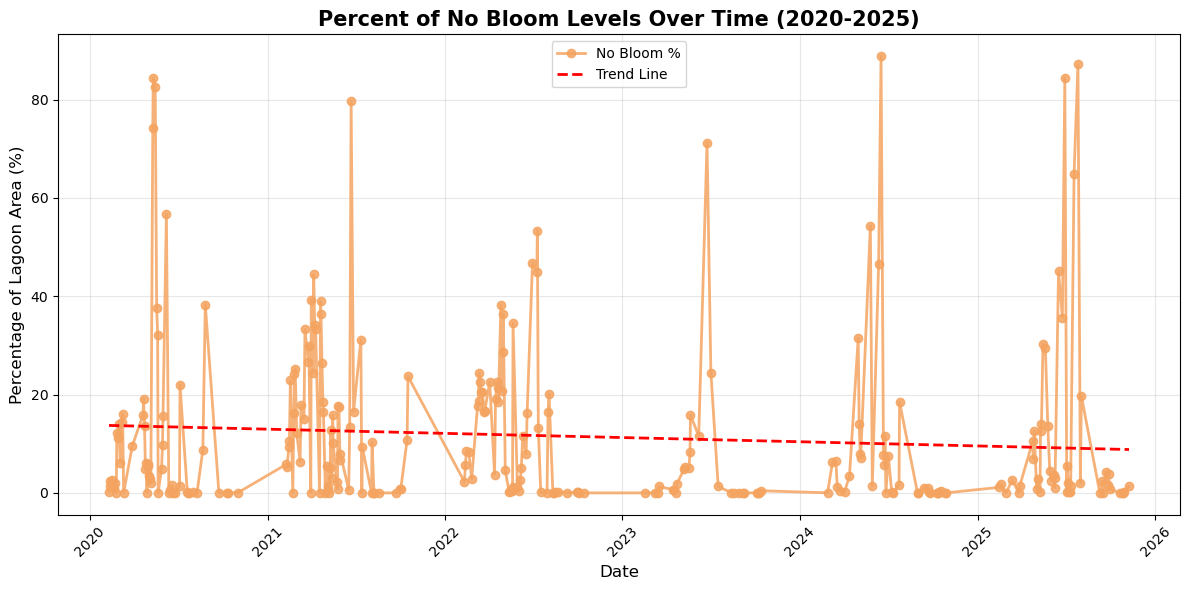

In [10]:
plt.figure(figsize=(12, 6))

# Plot each category as a line
plt.plot(df_comb['date'], df_comb['none_pct'], label='No Bloom %', marker='o', linewidth=2, color = 'sandybrown', alpha = 0.85)

# Calculate trend line
# Convert dates to numeric values for regression
df_comb['date_numeric'] = (df_comb['date'] - df_comb['date'].min()).dt.days

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_comb['date_numeric'], df_comb['none_pct'])

# Create trend line
trend_line = slope * df_comb['date_numeric'] + intercept

trend_eq = f'{slope:3f}X + {intercept:3f}'

# Plot trend line
plt.plot(df_comb['date'], trend_line, '--', color='red', linewidth=2, 
         label=f'Trend Line')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Lagoon Area (%)', fontsize=12)
plt.title('Percent of No Bloom Levels Over Time (2020-2025)', fontsize=15, fontweight = 'bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(r_value)
print(p_value)

-0.08881774526348944
0.13892278607668784
